# RM Transforms with simulated data

We first import libraries and the transforms that can be seen in the file transforms.py. Additionally, we define speed of light $c$ and the 1D $\phi$ and $\lambda$ lengths and grids.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from transforms import *
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

c = 2.99792458e8

n = 200 # -> phi_space
m = 300 # -> lambda2_space

start_range = 3.6 # starting sim wavelength cm 
end_range = 95.0 # ending sim wavelength cm

stop_a_range = 3.6 #cm # weights lambda start
stop_b_range = 50.0 #cm # weights lambda ending

w_range = np.array([end_range, start_range])/100.0 #wavelength range in metres

#nu_range = c/(w_range) # frequency range in Hz

lambda1 = np.linspace(w_range[1], w_range[0], m) # lambda grid

$\lambda^2$ grid

In [2]:
lambda2 = lambda1*lambda1

#print(lambda2)

lambda2_ref = np.median(lambda2) #reference lambda^2


As Brenjens and de Bruyn $\phi$ goes from -150 to 150 [rad $m^{-2}$].

In [3]:
start = -150
end = 150
phi = np.linspace(start, end, n)

We will use 3 simulated sources, a 10 Jy point source at -10 [rad $m^{-2}$] and two plateaus. The first one has an intensity of 2 Jy and goes from 30 to 50 [rad $m^{-2}$], and the seconds has an intensity of 3 Jy and goes from 90 to 100 [rad $m^{-2}$].

In [4]:
ps_F = [10,2,3] #Jy
ps_1_pos = -10

ps_2_pos = [30,50]

ps_3_pos = [90,100]

We construct our Faraday dispersion function and our weighting function.

In [5]:
F = np.zeros(n)
W = np.zeros(m)

#simulated spikes and sources indexes
ps_1_idx = (np.abs(phi-ps_1_pos)).argmin()
ps_2_idx = [(np.abs(phi-ps_2_pos[0])).argmin(), (np.abs(phi-ps_2_pos[1])).argmin()]
ps_3_idx = [(np.abs(phi-ps_3_pos[0])).argmin(), (np.abs(phi-ps_3_pos[1])).argmin()]

#weighting function indexes
pos_start_w = (np.abs(lambda2-(stop_a_range/100.0)**2)).argmin()
pos_end_w = (np.abs(lambda2-(stop_b_range/100.0)**2)).argmin()

W[pos_start_w:pos_end_w] = 1

K = 1/np.sum(W);

F[ps_1_idx] = ps_F[0];
F[ps_2_idx[0]:ps_2_idx[1]] = ps_F[1];
F[ps_3_idx[0]:ps_3_idx[1]] = ps_F[2];

Finally, we get the complex polarized brightness $P$, the rotation measure transfer function or "synthesized beam" and the measured Faraday dispersion function

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


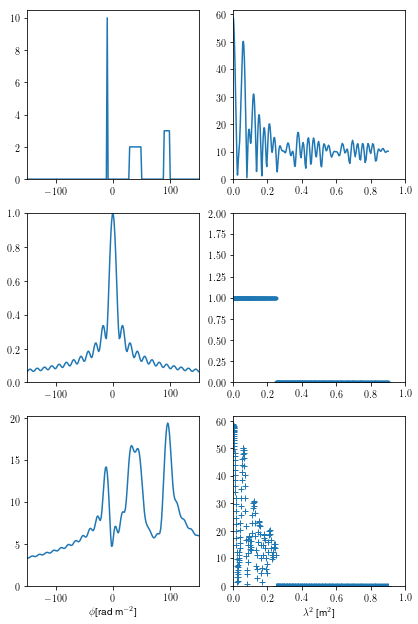

In [6]:
P = form_P(F, phi, lambda2, m)
R = form_R(K, W, phi, lambda2, lambda2_ref, n)
P_meas = form_P_meas(W, F, phi, lambda2, m)
F_meas = form_F_meas(K, P_meas, phi, lambda2, lambda2_ref, n)

f, axarr = plt.subplots(3, 2)

#Simulated F
axarr[0,0].plot(phi, np.abs(F))
axarr[0,0].set_ylim([0, None])
axarr[0,0].set_xlim([start, end])

# P
axarr[0,1].plot(lambda2, np.abs(P))
axarr[0,1].set_ylim([0, None])
axarr[0,1].set_xlim([0, 1])

# R
axarr[1,0].plot(phi, np.abs(R))
axarr[1,0].set_ylim([0, 1])
axarr[1,0].set_xlim([start, end])

# Weight function
axarr[1,1].plot(lambda2, np.abs(W) , '.')
axarr[1,1].set_ylim([0, 2])
axarr[1,1].set_xlim([0, 1])

#Measured F
axarr[2,0].plot(phi, np.abs(F_meas))
axarr[2,0].set(xlabel=r'$\phi$[rad m$^{-2}$]')
axarr[2,0].set_ylim([0, None])
axarr[2,0].set_xlim([start, end])

#Measured P
axarr[2,1].plot(lambda2, np.abs(P_meas), '+')
axarr[2,1].set(xlabel=r'$\lambda^2$ [m$^{2}$]')
axarr[2,1].set_ylim([0, None])
axarr[2,1].set_xlim([0, 1])

plt.subplots_adjust(right=1.0)
plt.subplots_adjust(top=3.0)
plt.subplots_adjust(bottom=1.0)